**Задание №2. Кластеризация. Кирякин Максим. 207 группа**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.datasets import make_blobs
import time
from scipy.spatial.distance import pdist, squareform

**Задание начальных значений для точек разбиения**


Реализация функции Kmeans. Функция принимает на вход список из точек. Каждая точка представляет собой список из двух координат - х и у. Также функция принимает numpy массив, в котором хранятся точки начальной инициализации. Число этих точек и определяет, на сколько кластеров будет производиться разбиение.

In [ ]:

def kmeans(mas, center):
    return_list = []
    return_list_index = []
    # В цикле прохожусь по всем элементам и вычисляю их расстояния до центоров
    difference_flag = 1
    while(difference_flag):
        centers_points = []
        for i in range(center.shape[0]):
            centers_points.append([])

        for i in range(mas.shape[0]):
            # Иду по точкам и смотрю, в какому центру текущая точка ближе всего
            minim = math.sqrt((mas[i][0] - center[0][0])**2 + (mas[i][1] - center[0][1])**2)
            index = 0
            for j in range(len(centers_points)):
                d = math.sqrt((mas[i][0] - center[j][0])**2 + (mas[i][1] - center[j][1])**2)
                if d < minim:
                    index = j
                    minim = d
            # Кладу индекс этой точки в список точек ближайшего центра
            centers_points[index].append(i)

        # Рассчёт координат новых центров
        difference_flag = 0
        for i in range(len(centers_points)):
            # Считаю новый х и новый у для центра
            # Координата х
            s = 0
            for j in range(len(centers_points[i])):
                s = s + mas[centers_points[i][j]][0]
            if len(centers_points[i]) != 0:
                s = s / len(centers_points[i])

            if center[i][0] - s != 0:
                difference_flag = 1
            center[i][0] = s

            # Координата y
            s = 0
            for j in range(len(centers_points[i])):
                s = s + mas[centers_points[i][j]][1]
            if len(centers_points[i]) != 0:
                s = s / len(centers_points[i])
            if center[i][1] - s != 0:
                difference_flag = 1
            center[i][1] = s

    #оформляю возвращаемое значение
    for i in range(len(centers_points)):
        for j in range(len(centers_points[i])):
            return_list.append(mas[centers_points[i][j]].tolist())
            return_list_index.append(i)

    return [np.array(return_list), return_list_index]


**Исследовать зависимость от стратегии начальной инициализации**

Начальные точки распределены равномерно по всей выборке


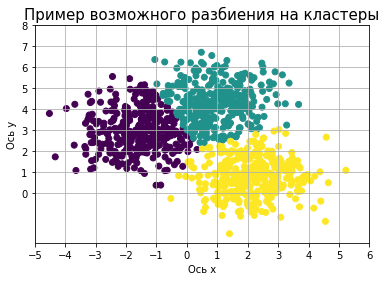

Time
0.2613530158996582


In [ ]:
X, y = make_blobs(n_samples = 1000, n_features = 2, centers=3, random_state= 0)
start_points = np.array([[-2, 1], [1, 6], [4, 1]], dtype=float)
start_time = time.time()
list1, gr = kmeans(X, start_points)
plt.scatter(list1[:,0], list1[:, 1], c = gr)
plt.title('Пример возможного разбиения на кластеры', fontsize=15)
plt.grid()
plt.xlabel("Ось x")
plt.xticks(np.arange(-5, 7, 1))
plt.ylabel("Ось y")
plt.yticks(np.arange(0, 9, 1))
plt.show()
print("Time")
print(time.time() - start_time)

Точки находятся рядом друг с другом приблизительно в центре выборки


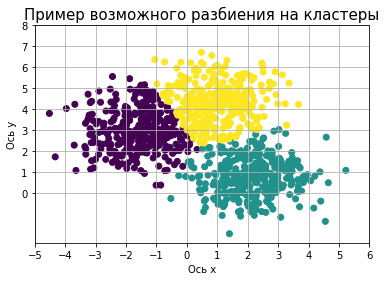

Time
0.29397034645080566


In [ ]:
X, y = make_blobs(n_samples = 1000, n_features = 2, centers=3, random_state= 0)
start_points = np.array([[0, 2], [1, 2], [0.5, 3]], dtype=float)
start_time = time.time()
list1, gr = kmeans(X, start_points)
plt.scatter(list1[:,0], list1[:, 1], c = gr)
plt.title('Пример возможного разбиения на кластеры', fontsize=15)
plt.grid()
plt.xlabel("Ось x")
plt.xticks(np.arange(-5, 7, 1))
plt.ylabel("Ось y")
plt.yticks(np.arange(0, 9, 1))
plt.show()
print("Time")
print(time.time() - start_time)

Точки находятся радом друг с другом приблизительно с краю выборки

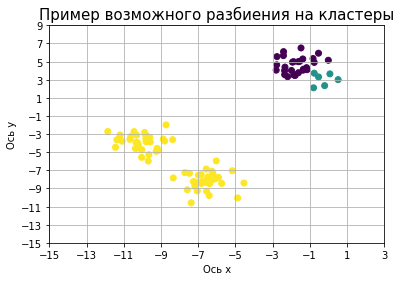

Time
0.18213391304016113


In [ ]:
X, y = make_blobs(n_samples = 100, n_features = 2, centers=3, random_state= 1)
start_time = time.time()
start_points = np.array([[1, 6], [2, 6], [1.5, 5]], dtype=float)
list1, gr = kmeans(X, start_points)
plt.scatter(list1[:,0], list1[:, 1], c = gr)
plt.title('Пример возможного разбиения на кластеры', fontsize=15)
plt.grid()
plt.xlabel("Ось x")
plt.xticks(np.arange(-15, 5, 2))
plt.ylabel("Ось y")
plt.yticks(np.arange(-15, 10, 2))
plt.show()
print("Time")
print(time.time() - start_time)

**Вывод**
1.   Алгоритм чувствителен к начальной инициализации.
2.   Если начальные точки находятся внути выборки, то алгоритм сходится, причем примерно за одинаковое время. При размещении некоторых начальных точек на довольно большом расстоянии от остальных, возможна некорректная работа. Начальная точка может просто не быть задействована.


**Исследовать, для каких задач подходит / не подходит алгоритм**

1. Алгоритм подходит для задач, в которых допустимо разбиение на кластеры. То есть, если выборка представляет собой множество точек, равномерно распределенных по плоскости, то алгоритм все равно разобьет эту выборку на кластеры, хотя это не имеет никакого смысла. Пример:

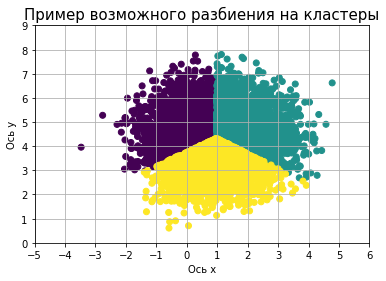

In [ ]:
X, y = make_blobs(n_samples = 10000, n_features = 2, centers=1, random_state= 0)
start_points = np.array([[1, 6], [2, 6], [1.5, 5]], dtype=float)
list1, gr = kmeans(X, start_points)
plt.scatter(list1[:,0], list1[:, 1], c = gr)
plt.title('Пример возможного разбиения на кластеры', fontsize=15)
plt.grid()
plt.xlabel("Ось x")
plt.xticks(np.arange(-5, 7, 1))
plt.ylabel("Ось y")
plt.yticks(np.arange(0, 10, 1))
plt.show()

Межкластерное расстояние в таком случае имеет следующий вид

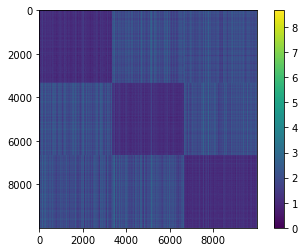

In [ ]:
dist = pdist(list1, 'euclidean')
distances_as_2d_matrix = squareform(dist)
fig = plt.imshow(distances_as_2d_matrix)
plt.colorbar()

Видим, что выделенные кластеры не сильно отличаются по расстоянию от остальнух выборок совокупности

2. Алгоритм не может распознать явновыделенные кластеры, если один из них лежит внутри другого, при этом они никак не наслаиваются и не перекрывают друг друга. Рассмотрим пример:

Задано следующие множество точек:

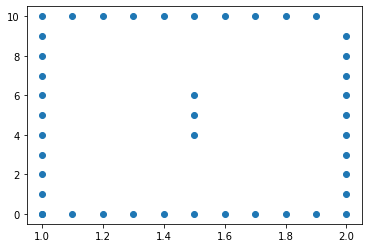

In [ ]:
data=np.array([[i/10, 0] for i in range(10, 20)])
data1=np.array([[i/10, 10] for i in range(10, 20)])
data = np.append(data,data1, axis = 0)
data1=np.array([[1, i] for i in range(0, 10)])
data = np.append(data,data1, axis = 0)
data1 = np.array([[2, i] for i in range(0, 10)])
data = np.append(data,data1, axis = 0)
data = np.append(data,[[1.5,5], [1.5,6], [1.5, 4]], axis = 0)
plt.scatter(data[:,0], data[:, 1])

Результат работы алгоритма:

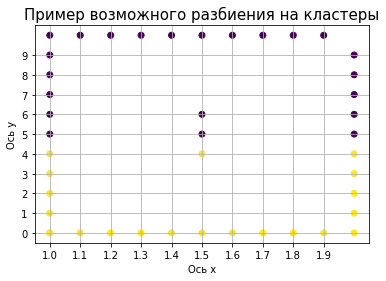

In [ ]:
start_points = np.array([[1, 6], [2, 6]], dtype=float)
list1, gr = kmeans(data, start_points)
plt.scatter(list1[:,0], list1[:, 1], c = gr)
plt.title('Пример возможного разбиения на кластеры', fontsize=15)
plt.grid()
plt.xlabel("Ось x")
plt.xticks(np.arange(1, 2, 0.1))
plt.ylabel("Ось y")
plt.yticks(np.arange(0, 10, 1))
plt.show()

**Предположить и исследовать стратегию выбора числа кластеров**



1.   Визуализировать набор данных и определить примерное число кластеров
2.   Попробовать использовать метод наименьших квадратов для каждого кластера. Он позволит определить насколько "густым" является кластер в зависимости от началоного значения разбиения. Сравнивать будем межкластерное и внутрикластерное расстояния




Например, можно визуализировать следующую совокупность:

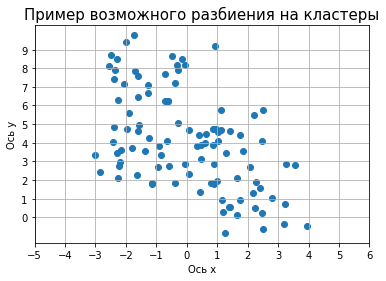

In [ ]:
X, y = make_blobs(n_samples = 100, n_features = 2, centers=4, random_state= 0)
plt.scatter(X[:,0], X[:, 1])
plt.title('Пример возможного разбиения на кластеры', fontsize=15)
plt.grid()
plt.xlabel("Ось x")
plt.xticks(np.arange(-5, 7, 1))
plt.ylabel("Ось y")
plt.yticks(np.arange(0, 10, 1))
plt.show()

Видно, что можно выделить примерно 4 основных скопления

Теперь посмотрим, как можно с помощью расстояния между точками кластера понять, что разбиние приемлемо, и с ним можно дальше работать 

In [ ]:
X, y = make_blobs(n_samples = 100, n_features = 2, centers=4, random_state= 0)
start_points = np.array([[1, 6], [2, 6]], dtype=float)
X, y = make_blobs(n_samples = 100, n_features = 2, centers=4, random_state= 0)

In [ ]:
def print_compare(start_points):
    fig, axes = plt.subplots(1, 2)
    list1, gr = kmeans(X, start_points)
    plt.scatter(list1[:,0], list1[:, 1], c = gr)
    axes[0].scatter(list1[:,0], list1[:, 1], c = gr)
    axes[0].grid()

    dist = pdist(list1, 'euclidean')
    distances_as_2d_matrix = squareform(dist)
    axes[1].imshow(distances_as_2d_matrix)

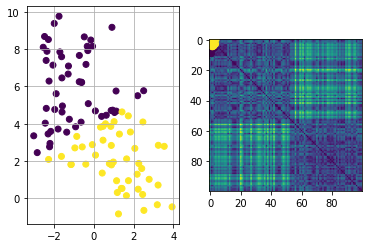

In [ ]:
start_points = np.array([[1, 6], [2, 6]], dtype=float)
print_compare(start_points)

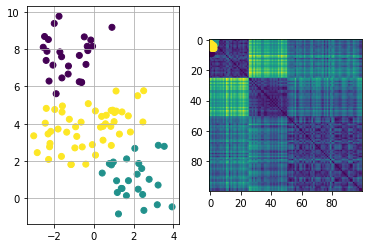

In [ ]:
start_points = np.array([[1, 6], [2, 6], [0, 5]], dtype=float)
print_compare(start_points)

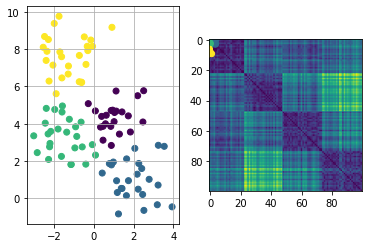

In [ ]:
start_points = np.array([[1, 6], [2, 6], [0, 5], [-2, 8]], dtype=float)
print_compare(start_points)

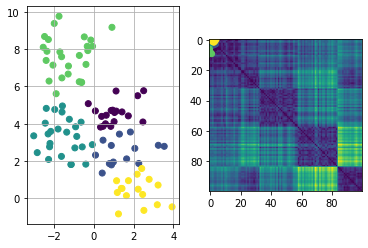

In [ ]:
start_points = np.array([[1, 6], [2, 6], [0, 5], [-2, 8], [0, 0]], dtype=float)
print_compare(start_points)

Видим, что на третьей цветовой диаграмме квадраты кластеров имеют более темный цвет, а на остальных участках преобладают светные цвета. Значит, можно рассматривать это разбиение.

**Исследовать зависимость (скорости настройки) от объёма данных/сложности задачм**



*   Проверим зависимость от числа точек
*   Проверим зависимость от числа кластеров



Время работы алгоритма прямо пропорционально количеству точек в совокупносте. Сложность линейная. Это видно также из примера. При увеличении числа точек на один порядок, время работы также увеличилось на порядок

Time1
0.15073060989379883
Time2
1.7209210395812988


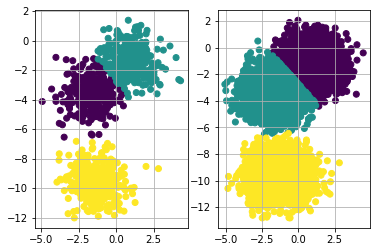

In [ ]:
fig, axes = plt.subplots(1, 2)

start_time = time.time()
X, y = make_blobs(n_samples = 1000, n_features = 2, centers=3, random_state= 2)
start_time = time.time()
start_points = np.array([[1, 6], [2, 6], [1.5, 5]], dtype=float)
list1, gr = kmeans(X, start_points)
axes[0].scatter(list1[:,0], list1[:, 1], c = gr)
axes[0].grid()
print("Time1")
print(time.time() - start_time)

start_time = time.time()
X, y = make_blobs(n_samples = 10000, n_features = 2, centers=3, random_state= 2)
start_time = time.time()
start_points = np.array([[1, 6], [2, 6], [1.5, 5]], dtype=float)
list1, gr = kmeans(X, start_points)
axes[1].scatter(list1[:,0], list1[:, 1], c = gr)
axes[1].grid()

print("Time2")
print(time.time() - start_time)

Время работы алгоритма линейно пропорционально количеству кластеров. Сложность линейная. При увеличении числа кластеров на один порядок, время работы увеличилось на один порядок. (Экспериментальное значение увеличилось на два порядка. Это обусловненно тем, что в функции в конце выполнения происходит повторый обход всех групп, чтобы вернуть отсортированный масив. В самом алгоритме этот обход никак не задействован)

Time1
0.16317152976989746
Time2
18.867693424224854


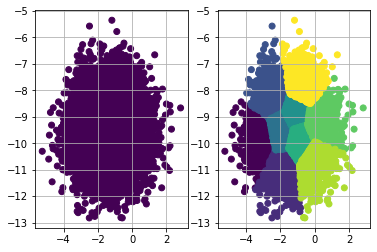

In [ ]:
fig, axes = plt.subplots(1, 2)
start_time = time.time()
X, y = make_blobs(n_samples = 10000, n_features = 2, centers=1, random_state= 2)
start_time = time.time()
start_points = np.array([[1, 6]], dtype=float)
list1, gr = kmeans(X, start_points)
axes[0].scatter(list1[:,0], list1[:, 1], c = gr)
axes[0].grid()
print("Time1")
print(time.time() - start_time)

start_time = time.time()
start_points = np.array([[i, 1] for i in range(-10, 8)], dtype=float)
list1, gr = kmeans(X, start_points)
axes[1].scatter(list1[:,0], list1[:, 1], c = gr)
axes[1].grid()
print("Time2")
print(time.time() - start_time)

**Предположить эвристику для визуализации матрицы попарных расстояний**

Визуализация проводилась с помощью функции imshow библиотеки matplotlib.
Функиция кластеризации возвращает массив, а котором записаны точки в порядке групп. С помощью матрицы можно оценить, попарные расстояния до и после упорядочивания по группам

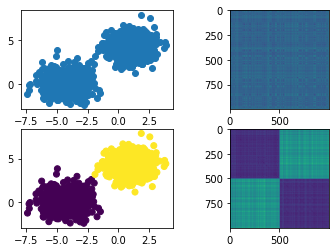

In [ ]:
fig, axes = plt.subplots(2, 2)
X, y = make_blobs(n_samples = 1000, n_features = 2, centers=2, random_state= 3)
start_time = time.time()
start_points = np.array([[1, 1], [1, 2]], dtype=float)
list1, gr = kmeans(X, start_points)
axes[1, 0].scatter(list1[:,0], list1[:, 1], c = gr)
axes[0, 0].scatter(X[:,0], X[:, 1])


dist = pdist(list1, 'euclidean')
distances_as_2d_matrix = squareform(dist)
axes[1, 1].imshow(distances_as_2d_matrix)

dist = pdist(X, 'euclidean')
distances_as_2d_matrix = squareform(dist)
axes[0, 1].imshow(distances_as_2d_matrix)
